In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="style.css">

<h3 style="margin-bottom: 0px;">Riccardo Petri</h3>
<p style="margin-top: 0px;">Matricola 167623</p>
<h2 style="font-size: xxx-large;"><b>Fondamenti Di Scienza Dei Dati<br>E Laboratorio</b></h2>
<div style="padding-top: 5px; font-size: medium;">
    <h3 style="padding-bottom: 0px;">Modulo: <b>Presentazione del progetto</b></h3>
    <h3>Topic: <b style="color: #FFA500;">DJ Mag Top 100 Club: Trend e Cambiamenti</b></h3>
</div>
<p style="padding-top: 35px;">Premi <button>Esc</button> in qualsiasi momento per vedere la mappa di navigazione</p>

<h2>1. Radici del progetto</h2>
<h3>Motivazioni della ricerca</h3>
<ul>
    <li>Interesse verso l'industria dell'intrattenimento notturno 🌒</li>
    <li>Importanza economica e culturale dei club nelle città</li>
    <ul>
        <li><i style="color: #FFA500;">La techno berlinese diventa patrimonio immateriale dell’Unesco (2024)</i></li>
    </ul>
</ul>

<h3 style="padding-top: 10px;">Origine dell'interesse nel settore</h3>
<ul>
    <li>Passione per la musica elettronica e gli eventi dal vivo</li>
    <li>Esperienze dirette frequentando alcuni club di fama mondiale</li>
    <li>Passione per il campo del DJing e della produzione musicale 🎧🎵</li>
</ul>

<h3>Focus dell'analisi 🔍</h3>
<ul>
    <li>Quali sono le tendenze emergenti nel panorama dei club?</li>
</ul>

<ul>
    <li>Come è evoluta la classifica dei top 100 club dal 2018 al 2024?</li>
</ul>

<ul>
    <li>Come è variata la distribuzione geografica dei club negli anni?</li>
</ul>

<ul>
    <li>TODO</li>
</ul>

<h2>2. Descrizione dei dati</h2>
<p>I dati utilizzati provengono dalla classifica realizzata da<br>DJ Magazine dei top 100 club (al mondo) dal 2018 al 2024 🌍</p>
<ul>
    <li>Il dataset contiene informazioni su:</li>
    <ul>
        <li>Posizione in classifica</li>
        <li>Nome del club</li>
        <li>Città e altre metriche rilevanti</li>
    </ul>
</ul>

<ul style="margin-top: 1em;">
    <li>Alcuni dati che sarebbero stati interessanti includono:</li>
    <ul>
        <li>Specifiche demografiche dei frequentatori</li>
        <li>Entrate finanziarie 💰</li>
        <li>Genere musicale principale</li>
    </ul>
</ul>

<h3>Campione parziale del dataset 📊</h3>
<p style="padding-top: 10px; padding-bottom: 10px;">Attenzione! Alcune colonne sono state omesse<br>per motivi di spazio e/o perchè poco utili a livello esemplificativo</p>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_json('datasets/top_clubs_2018_2024_fixed.json')
partial_df = df.drop(['arrow', 'numpos'], axis=1).head(5)

display(partial_df)

,rank,name,city,country,lat,lng,capacity,year
0,1,Green Valley,Camboriú,Brazil,-27.02736,-48.653566,12000,2018
1,2,Ushuaïa Ibiza,Playa D’en Bossa,Ibiza,38.896173,1.415486,5000,2018
2,3,Zouk Singapore,Singapore,Unknown,1.357107,103.819499,2600,2018
3,4,Echostage,Washington,D.C.,38.895037,-77.036543,3000,2018
4,5,Hï Ibiza,Ibiza,Spain,38.97439,1.419746,3000,2018


<p>ecc.</p>

<p>L'ultima modifica al <i>dataset</i> risale al 10/06/2024</p>

<h3>Come sono stati ottenuti questi dati <i style="color: #FFA500;">step-by-step</i></h3>
<ul>
    <li>🔍 Analisi della struttura del sito web</li>
    <ul>
        <li>URL: djmag.com/top100clubs/{year}</li>
    </ul>
</ul>

<ul>
    <li>🛠️ Realizzazione di un <i style="color: #FFA500;">web scraper</i></li>
    <ul>
        <li>Raccolta e normalizzazione dei dati in un file JSON</li></li>
    </ul>
</ul>

<ul>
    <li>📝 Normalizzazione manuale</li>
    <ul>
        <li>Aggiustamenti necessari post-raccolta</li>
    </ul>
</ul>

<p style="padding-top:10px;">Il <i>dataset</i> e il <i>codice sorgente</i> del web scraper sono reperibili online sulla pagina GitHub @riccardopetrii</p>

<h2>3. Analisi effettuata</h2>
<h3>Indice</h3>
<ul>
    <li>3.1 Qual'è il club in tendenza degli ultimi anni?</li>
    <ul>
        <li>Quale invece ha avuto la maggior regressione?</li>
    </ul>
    <li>3.2 Come si è evoluta la classifica negli anni?</li>
    <ul>
        <li>Qual'è stato l'andamento delle 'New entry' e "Re-entry'?</li>
    </ul>
    <li>3.3 Cosa evidenzia la distribuzione geografica dei club dal 2018 al 2024?</li>
    <li>3.4 TODO</li>
</ul>

<h2>3.1 Club in tendenza 🪩</h2>
<p style="padding-bottom: 0px !important;">Il club in tendenza degli ultimi anni è <i>'Studio 338'</i> con una differenza di 70 posizioni</p>

In [3]:
# invalid parsing will be set as NaN
df['rank'] = pd.to_numeric(df['rank'], errors='coerce') 
df['numpos'] = pd.to_numeric(df['numpos'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df = df.dropna(subset=['rank', 'name', 'year']) # drop every NaN

# foreach club get rank of the first and last avaiable year
initial_positions = df.sort_values(by='year').groupby('name')['rank'].first()
final_positions = df.sort_values(by='year').groupby('name')['rank'].last()

position_change = initial_positions - final_positions # this value can be negative

max_climb_club = position_change.idxmax() # return index of the maximum value (name)
max_climb_value = position_change.max() # return the maximum value (num of positions)

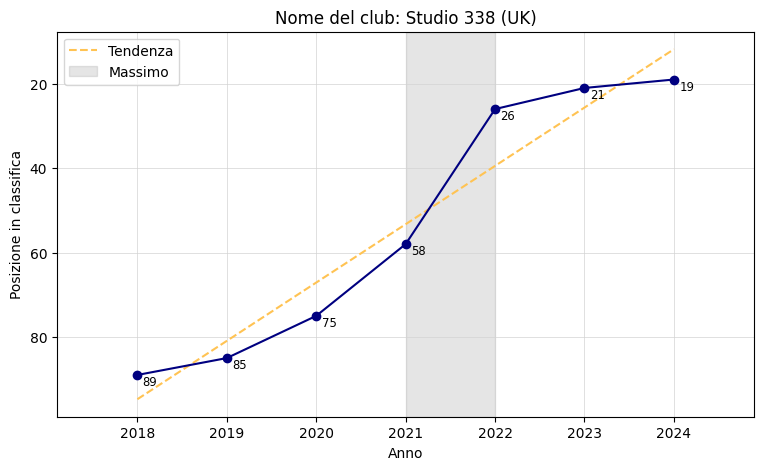

In [4]:
# draw graph
max_climb_club_df = df[df['name'] == max_climb_club] # 'history' of the club
max_climb_club_country = df[df['name'] == max_climb_club]['country'].iloc[0] # get country

plt.figure(figsize=(9, 5))
plt.margins(0.15, 0.05) # default value 0.05

# linear trendline
z = np.polyfit(max_climb_club_df['year'], max_climb_club_df['rank'], 1) # calculate coefficients (m, q)
p = np.poly1d(z) # create a polynomial from coefficients (y = mx + q)

plt.plot(max_climb_club_df['year'], p(max_climb_club_df['year']), linestyle='--', color="#ffc353", label='Tendenza')
plt.plot(max_climb_club_df['year'], max_climb_club_df['rank'], marker='o', linestyle='-', color='navy')

# place labels for every dot
for x, y in zip(max_climb_club_df['year'], max_climb_club_df['rank']):
    plt.text(x+.06, y+0.09, y, ha='left', va='top', fontsize='small')

plt.title(f"Nome del club: {max_climb_club} ({max_climb_club_country})")
plt.xlabel("Anno")
plt.ylabel("Posizione in classifica")
plt.gca().invert_yaxis()
plt.grid(color='lightgray', linewidth = 0.5)

# find best period
rank_diff = np.abs(np.diff(max_climb_club_df['rank'].to_numpy())) # example: [3, 1, 4], [-2, 3], [2, 3]
max_diff_index = np.argmax(rank_diff) # index: 1

start_year = max_climb_club_df.iloc[max_diff_index]['year'] # start year of the greatest change
end_year = max_climb_club_df.iloc[max_diff_index + 1]['year']

plt.axvspan(start_year, end_year, color='gray', alpha=0.2, label="Massimo")

plt.legend()
plt.show()

<h2>Maggior regressione 📉</h2>
<p style="padding-bottom: 0px !important;">Il club con la maggior regressione degli ultimi anni è <i>'EGG LDN'</i> con una differenza di 60 posizioni</p>

In [5]:
min_climb_club = position_change.idxmin() # return index of the minimum value (name)
min_climb_value = position_change.min() # return the minimum value (num of positions)

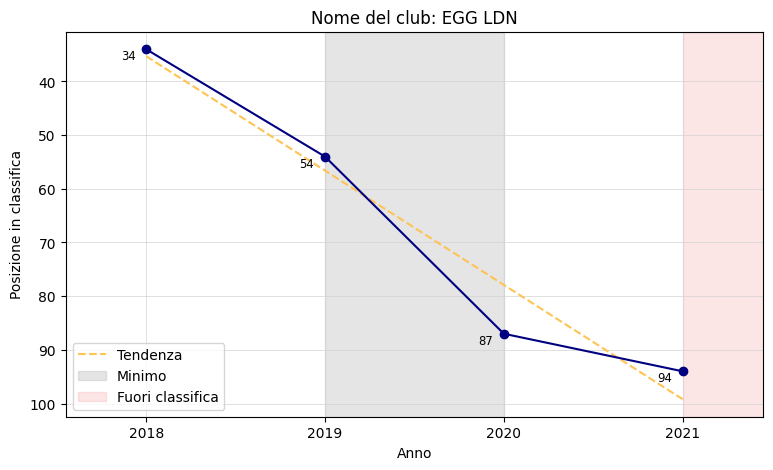

In [6]:
# draw graph
min_climb_club_df = df[df['name'] == min_climb_club]

plt.figure(figsize=(9, 5))
plt.margins(0.15, 0.05) # default value 0.05

# trendline
z = np.polyfit(min_climb_club_df['year'], min_climb_club_df['rank'], 1) # calculate coefficients (m, q)
p = np.poly1d(z) # create a polynomial from coefficients (y = mx + q)

plt.plot(min_climb_club_df['year'], p(min_climb_club_df['year']), linestyle='--', color="#ffc353", label='Tendenza')
plt.plot(min_climb_club_df['year'], min_climb_club_df['rank'], marker='o', linestyle='-', color='navy')

for x, y in zip(min_climb_club_df['year'], min_climb_club_df['rank']):
    plt.text(x-.06, y+.09, y, ha='right', va='top', fontsize='small')

plt.gca().xaxis.set_major_locator(ticker.FixedLocator(min_climb_club_df['year'])) # fix x axis

plt.title(f"Nome del club: {min_climb_club}")
plt.xlabel("Anno")
plt.ylabel("Posizione in classifica")
plt.gca().invert_yaxis()
plt.grid(color='lightgray', linewidth = 0.5)

# find worse period
rank_diff = np.abs(np.diff(min_climb_club_df['rank'].to_numpy())) # example: [3, 1, 4], [-2, 3], [2, 3]
min_diff_index = np.argmax(rank_diff) # index: 1

start_year = min_climb_club_df.iloc[min_diff_index]['year'] # start year of the worst change
end_year = min_climb_club_df.iloc[min_diff_index + 1]['year']

plt.axvspan(start_year, end_year, color='gray', alpha=0.2, label="Minimo")
plt.axvspan(2021, 2022, color='lightcoral', alpha=0.2, label="Fuori classifica") # manually checked

plt.legend()
plt.show()

<h2>3.2 Analisi dei movimenti in classifica</h2>
<p style="padding-bottom: 0px !important;">Nel 2019 è stato registrato il maggior numero di club saliti di posizione (53);<br>nel 2021 e 2023, il maggior numero di club scesi di posizione (40);<br>nel 2022, il maggior numero di club che hanno mantenuto la loro posizione (5)</p>

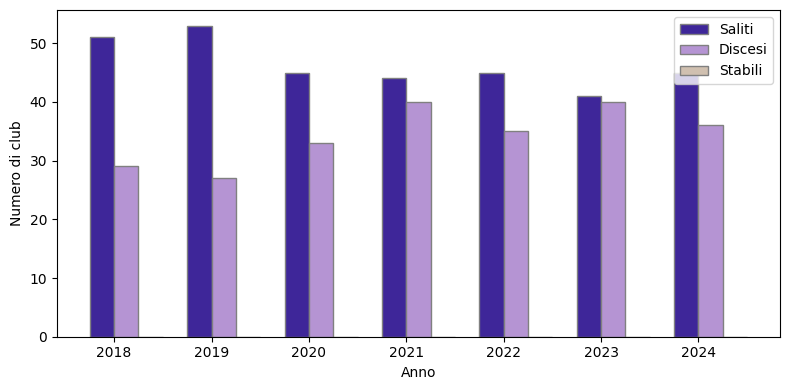

In [7]:
# dict
pos_up = df[df['arrow'] == 'up'].groupby('year').size()
pos_down = df[df['arrow'] == 'down'].groupby('year').size()
pos_nm = df[(df['arrow'] == 'Undefined') & (df['numpos'] == 'NON MOVER')].groupby('year').size()

years = df['year'].unique() # find unique years
years.sort()

# for every year get num of clubs (up, down or nm)
# if key is not in the dict default value is 0
up_counts = [pos_up.get(year, 0) for year in years]
down_counts = [pos_down.get(year, 0) for year in years]
nm_counts = [pos_nm.get(year, 0) for year in years]

barWidth = 0.25
fig, ax = plt.subplots(figsize =(8, 4))

br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, up_counts, color = '#3e2699', width = barWidth, edgecolor ='grey', label ='Saliti')
plt.bar(br2, down_counts, color ='#b594d3', width = barWidth, edgecolor ='grey', label ='Discesi')
plt.bar(br3, nm_counts, color = '#D0C0B0', width = barWidth, edgecolor ='grey', label ='Stabili')

plt.xlabel('Anno')
plt.ylabel('Numero di club')
plt.xticks([r + barWidth/2 for r in range(len(years))], years)

plt.legend()
plt.tight_layout()
plt.show()

<h2>Andamento delle <i>'New entry'</i> e <i>'Re-entry'</i></h2>
<p style="padding-bottom: 0px !important;">L'anno in cui è stato registrato il maggior numero<br>di 'New entry' (nuovi ingressi) è il 2020, mentre per i 'Re-entry' (rientri) è il 2018</p>

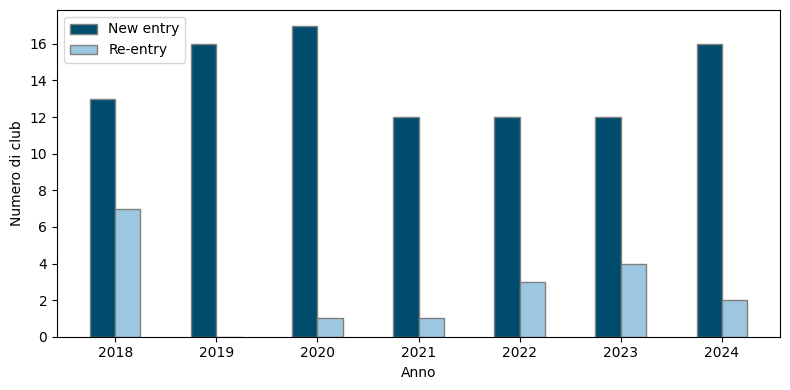

In [8]:
df = pd.read_json('datasets/top_clubs_2018_2024_fixed.json') # temp

# dict
new_entries = df[df['numpos'] == 'new entry'].groupby('year').size()
re_entries = df[df['numpos'] == 're-entry'].groupby('year').size()

years = df['year'].unique() # find unique years
years.sort()

# for every year get num of clubs (up, down or nm)
# if key is not in the dict default value is 0
new_entries_counts = [new_entries.get(year, 0) for year in years]
re_entries_counts = [re_entries.get(year, 0) for year in years]

barWidth = 0.25
fig, ax = plt.subplots(figsize =(8, 4))

br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]

plt.bar(br1, new_entries_counts, color ='#004c6d', width = barWidth, edgecolor ='grey', label ='New entry')
plt.bar(br2, re_entries_counts, color ='#9dc6e0', width = barWidth, edgecolor ='grey', label ='Re-entry')

plt.xlabel('Anno')
plt.ylabel('Numero di club')
plt.xticks([r + barWidth/2 for r in range(len(years))], years)

plt.legend()
plt.tight_layout()
plt.show()

<h2>C'è una relazione tra la capacità e la posizione in classifica?</h2>
<p style="padding-bottom: 0px !important;">Club con maggiore capacità tendono a posizionarsi leggermente peggio in classifica;<br>La capacità media del club è rimasta stabile intorno a 1200 persone negli anni</p>

Correlazione standard: -0.4


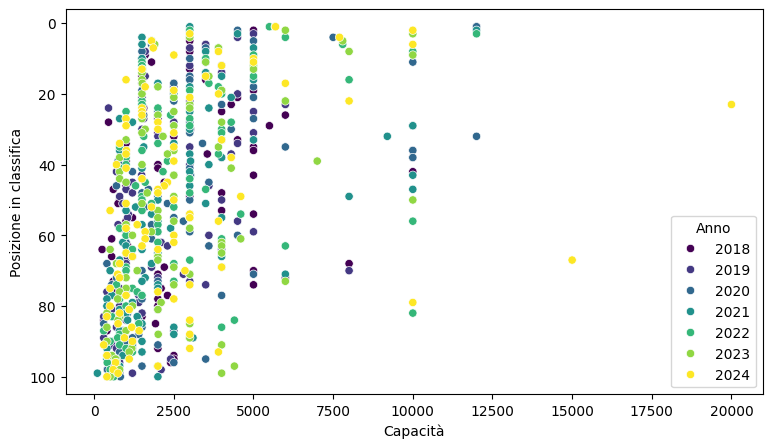

In [9]:
import seaborn as sns

club_df = df.copy()

club_df['rank'] = club_df['rank'].astype(int) # to int

club_df['capacity'] = pd.to_numeric(club_df['capacity'], errors='coerce')
club_df = club_df[club_df['country'] != 'Unknown']
club_df = club_df.dropna(subset=['capacity', 'rank'])

# find coeff of corr
correlation = club_df[['capacity', 'rank']].corr() # '1' cap up pos up, '-1' cap up pos down, '0' no corr
print('Correlazione standard: ' + str(round(correlation.iloc[0, 1], 1)))

plt.figure(figsize=(9, 5))
sns.scatterplot(x='capacity', y='rank', hue='year', data=club_df, palette='viridis')
plt.xlabel('Capacità')
plt.ylabel('Posizione in classifica')
plt.gca().invert_yaxis() # fix for y axis
plt.legend(title='Anno')
plt.show()

<h2>3.3 Distribuzione geografica dei club</h2>
<p style="padding-bottom: 0px !important;">La maggior concentrazione di club in classifica negli ultimi anni si trova in Europa e Regno Unito</p>

<script>
    function showVal(newVal) {
        document.getElementById("range").textContent = newVal;
        document.getElementById("img").src = `imgs/img_${newVal}.png`;
    }
    
    document.addEventListener('DOMContentLoaded', (event) => {
        const slider = document.getElementById("valR");
        slider.addEventListener("input", (event) => showVal(event.target.value));
        showVal(slider.value);
    });
</script>

<div class="container">
    <div class="slider-container">
        <input id="valR" type="range" min="2018" max="2024" value="2018" oninput="showVal(this.value)" />
        <span id="range">2018</span>
    </div>
    <img id="img" src="imgs/img_2018.png" alt="Image for the selected year">
</div>

<h2>4. Conclusioni e valutazioni finali</h2>
<p>Cosa abbiamo imparato e/o scoperto?</p>
<p>TODO</p>
<p>TODO</p>